**Python version:**  3.x

In [1]:
# set the path of the directories where your modules and files are
modulesPath = 'C:\\Users\loren\Documents\Progetti\__repo__\_myModules'
filesPath = 'C:\\Users\loren\Documents\Progetti\Scuola\AdvDataMining\_files'

#### Moduli

In [2]:
import os
import sys

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Modules for the project:', modulesList,sep='\n', end='\n\n')

filesList = os.listdir(filesPath)
print('Available Files for the project:', filesList,sep='\n')

%matplotlib inline

import df_handle
import data_understanding
import data_preparation
import modeling
import model_evaluation

Available Modules for the project:
['data_preparation.py', 'data_understanding.py', 'df_handle.py', 'modeling.py', 'model_evaluation.py', '__pycache__']

Available Files for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt']


In [3]:
X_train, X_test, y_train, y_test = df_handle.setup_df(trainFileName='datatraining.txt', y_name='Occupancy',
                                                      testFileName='datatest.txt', searchIn=filesPath)
del X_train['date']
del X_test['date']

# \Random Forest\

In [4]:
clf = modeling.fit_best_clf(X_train=X_train, y_train=y_train,
                            model=modeling.RandomForestClassifier(max_features='log2',
                                                                  random_state=0,
                                                                  n_estimators=100),
                            nbr_iter=20,
                            params_domain_dic={'max_depth':range(1,100)},
                            score_metric='f1')

Best values for searched parameters: 
{'max_depth': 3}


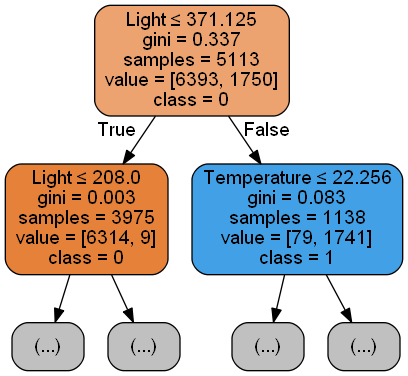

In [5]:
modeling.tree_plot(tree_clf=clf.estimators_[0], X_train=X_train, y_names=['0', '1'], tree_depth=1)

In [76]:
model_evaluation.validate_clf(clf=clf, X_train=X_train, y_train=y_train)

Accuracy at a 95 percent confidence interval: 0.98 (+/- 0.03)

Weighted Average F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.03)


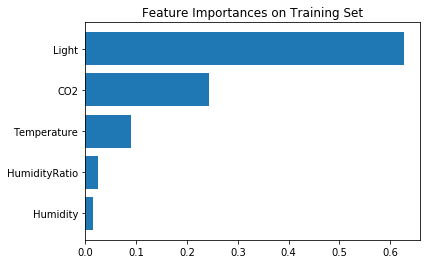

In [77]:
model_evaluation.feature_importance(estimator=clf, X_train=X_train, y_train=y_train)

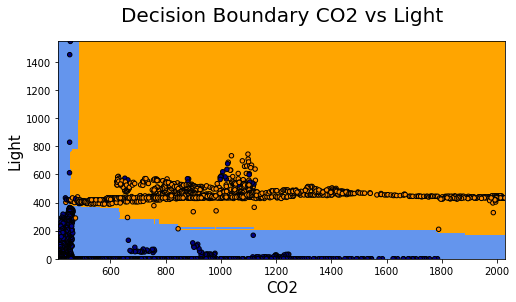

In [78]:
model_evaluation.decision_boundary_clf(clf=clf, X=X_train[['CO2', 'Light']], y=y_train, mesh_step=1)

Accuracy: 0.9786116322701689

F1-score: [0.98290855 0.97142857]

Weighted Average F1-score: 0.9787214781780913

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665




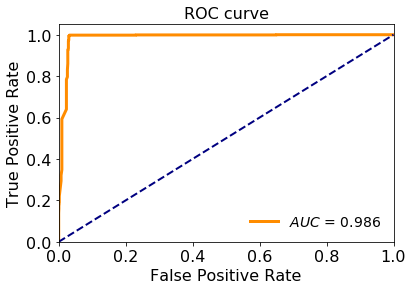

In [8]:
model_evaluation.test_clf(clf=clf,X_test=X_test,y_test=y_test)

# \Boosting\

In [16]:
clf = modeling.fit_best_clf(X_train=X_train, y_train=y_train,
                            model=modeling.AdaBoostClassifier(base_estimator=modeling.DecisionTreeClassifier(),
                                                              random_state=0,
                                                              n_estimators=100),
                            nbr_iter=5,
                            params_domain_dic={'learning_rate':data_understanding.np.arange(0.0, 1.0, 0.1)},
                            score_metric='f1')

Best values for searched parameters: 
{'learning_rate': 0.2}


In [17]:
model_evaluation.validate_clf(clf=clf, X_train=X_train, y_train=y_train)

Accuracy at a 95 percent confidence interval: 0.93 (+/- 0.12)

Weighted Average F1 Score at a 95 percent confidence interval: 0.93 (+/- 0.13)


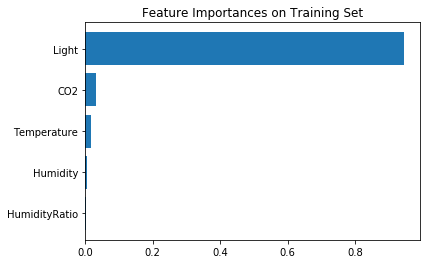

In [18]:
model_evaluation.feature_importance(estimator=clf, X_train=X_train, y_train=y_train)

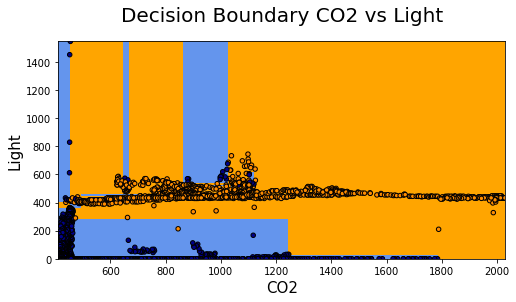

In [20]:
model_evaluation.decision_boundary_clf(clf=clf, X=X_train[['CO2', 'Light']], y=y_train, mesh_step=1)

Accuracy: 0.9385767022149303

F1-score: [0.96105078 0.85478788]

Weighted Average F1-score: 0.9387238052926682

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7703
           1       0.85      0.86      0.85      2049

    accuracy                           0.94      9752
   macro avg       0.91      0.91      0.91      9752
weighted avg       0.94      0.94      0.94      9752




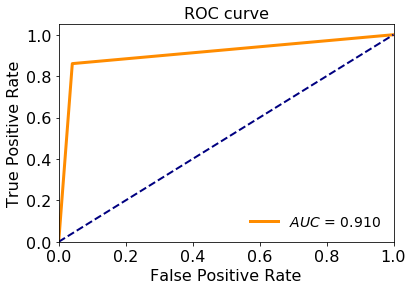

In [36]:
model_evaluation.test_clf(clf=clf,X_test=X_test,y_test=y_test)

# \Bagging\

In [4]:
'''
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = modeling.BaggingClassifier(base_estimator=modeling.LogisticRegression(),
                                 random_state=0,
                                 n_estimators=10)
clf.fit(X=X_train_pca, y=y_train)
'''

In [4]:
clf = modeling.BaggingClassifier(base_estimator=modeling.LogisticRegression(),
                                 random_state=0,
                                 n_estimators=50)
clf.fit(X=X_train, y=y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=0, ve

In [5]:
model_evaluation.validate_clf(clf=clf, X_train=X_train, y_train=y_train)

Accuracy at a 95 percent confidence interval: 0.98 (+/- 0.03)

Weighted Average F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.03)


Accuracy: 0.9786116322701689

F1-score: [0.98290855 0.97142857]

Weighted Average F1-score: 0.9787214781780913

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665




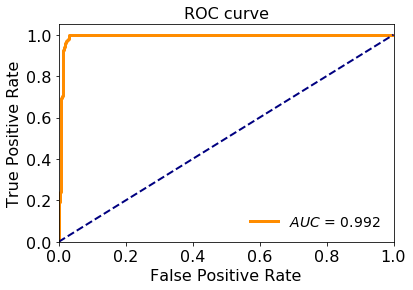

In [6]:
model_evaluation.test_clf(clf=clf,X_test=X_test,y_test=y_test)

In [7]:
X_train, X_test, y_train, y_test = df_handle.setup_df(trainFileName='datatraining.txt', y_name='Occupancy',
                                                      testFileName='datatest2.txt', searchIn=filesPath)
del X_train['date']
del X_test['date']

Accuracy: 0.992616899097621

F1-score: [0.99531311 0.98261709]

Weighted Average F1-score: 0.9926455406455875

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.99      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752




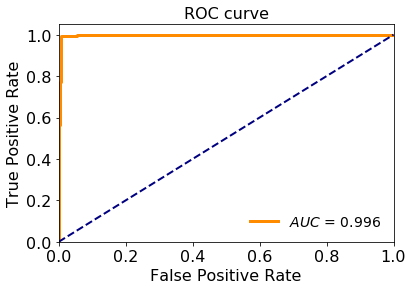

In [8]:
model_evaluation.test_clf(clf=clf,X_test=X_test,y_test=y_test)